In [20]:
#Inicialização
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math as m
#Função do FiltroGaussiano de navFunc foi alterado para printar apenas * enquanto faz as iterações.
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

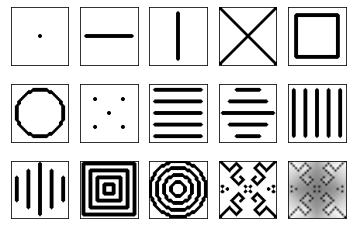

In [21]:
#Imagens básicas como entrada
img00 = cv.imread("../gcPDI/imgSimple/00sDot.png",0)
img01 = cv.imread("../gcPDI/imgSimple/01sHorizontal.png",0)
img02 = cv.imread("../gcPDI/imgSimple/02sVertical.png",0)
img03 = cv.imread("../gcPDI/imgSimple/03sX.png",0)
img04 = cv.imread("../gcPDI/imgSimple/04sSquare.png",0)
img05 = cv.imread("../gcPDI/imgSimple/05sCircle.png",0)
img10 = cv.imread("../gcPDI/imgSimple/10mDots.png",0)
img11 = cv.imread("../gcPDI/imgSimple/11mHorizontals.png",0)
img12 = cv.imread("../gcPDI/imgSimple/12mHorizontals2.png",0)
img13 = cv.imread("../gcPDI/imgSimple/13mVerticals.png",0)
img14 = cv.imread("../gcPDI/imgSimple/14mVerticals2.png",0)
img15 = cv.imread("../gcPDI/imgSimple/15mSquares.png",0)
img16 = cv.imread("../gcPDI/imgSimple/16mCircles.png",0)
img20 = cv.imread("../gcPDI/imgSimple/20random.png",0)
img21 = cv.imread("../gcPDI/imgSimple/21colorRandom.png",0)
simpleImg = [img00, img01, img02, img03, img04, img05, img10, img11, img12, img13, img14, img15, img16, img20, img21]              
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(simpleImg[i],cmap='gray')
    plt.xticks([]),plt.yticks([])
plt.show()

# Gaussiano
(Gaussian Blur, Gaussian Smoothing, Gaussian Lowpass Filters (GLPF))

## Teoria

O Filtro Gaussiano também é utilizado para borrar imagens e remover ruídos e detalhes. É implementado com a convolução da imagem com uma máscara gaussiana tri-dimensional, gerada pela fórmula:  

$$w(x,y) = \frac{1}{2\pi\sigma^2}e^{-\frac{x^2+y^2}{2\sigma^2}}$$

- **$\sigma$** : Desvio padrão da distribuição, com essa distribuição assumida de ter média 0.
-  **x, y** : Distâncias da origem, no eixo horizontal x e no eixo vertical y.

O papel do **$\sigma$** é controlar a variação em torno de seu valor médio. Maior o seu valor, mais variância é permitida. Isso significa um efeito de borrão mais forte, dando menos detalhes da imagem, filtrando mais as bordas.

## Manipulações com OpenCV

sigma = 0
ksize = 3


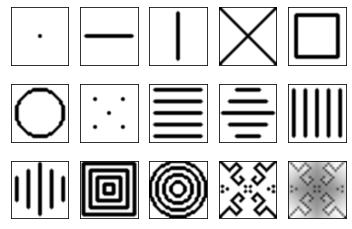

ksize = 5


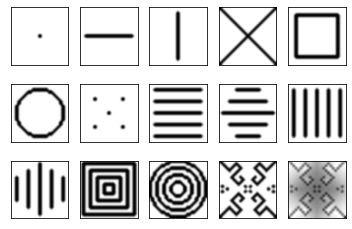

ksize = 7


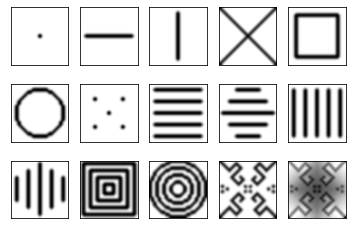

ksize = 9


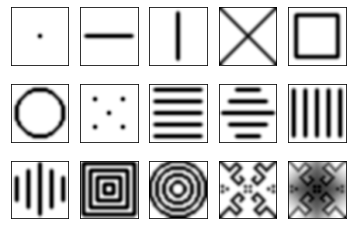

sigma = 4
ksize = 3


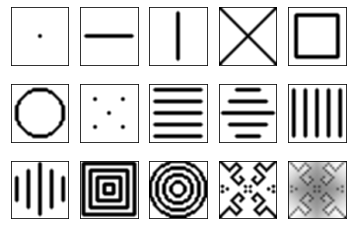

ksize = 5


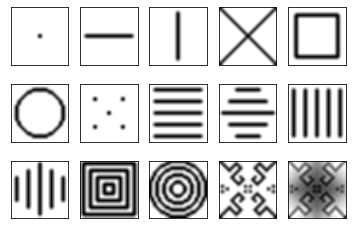

ksize = 7


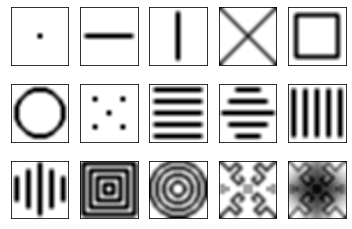

ksize = 9


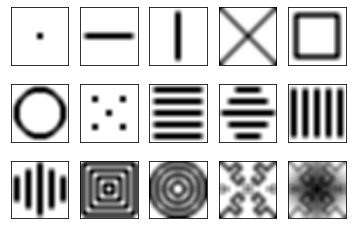

sigma = 8
ksize = 3


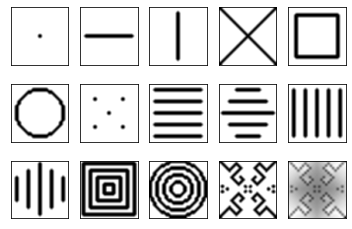

ksize = 5


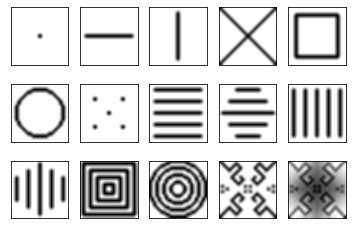

ksize = 7


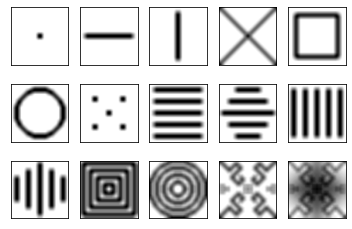

ksize = 9


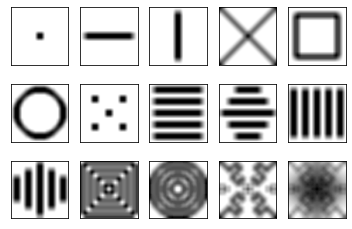

In [22]:
for sigma in range(0,6,2):
    print("sigma = {}".format(sigma*2))
    for ksize in range(3,10,2):
        print("ksize = {}".format(ksize))
        for i in range(15):
            plt.subplot(3,5,i+1)
            dst = cv.GaussianBlur(simpleImg[i],(ksize,ksize),sigma*2)
            plt.imshow(dst,cmap='gray')
            plt.xticks([]),plt.yticks([])    
        plt.show()

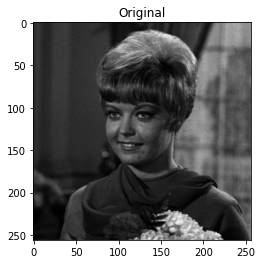

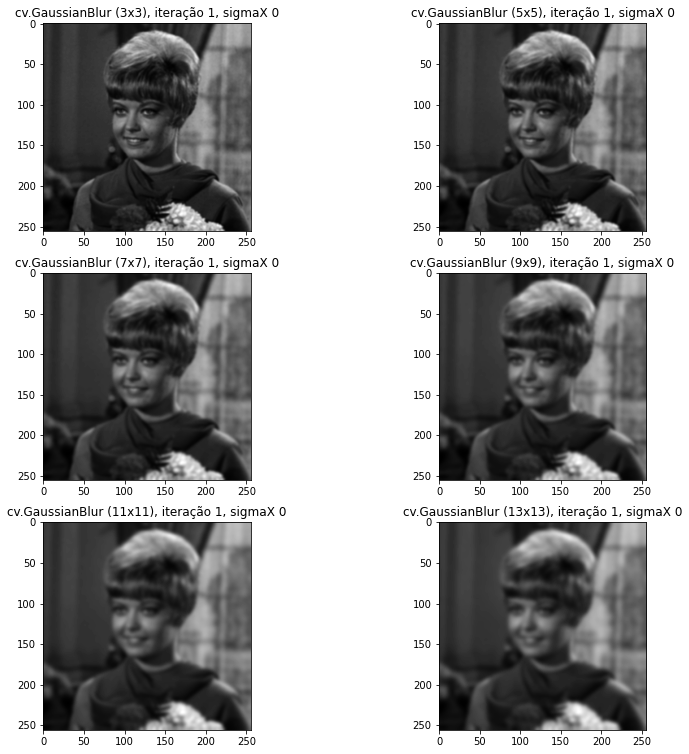

In [23]:
#Loop para 6 kernels
img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i=0
for ksize in range(3,15,2):    
    dst = cv.GaussianBlur(img,(ksize,ksize),0)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if ksize < 6 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.GaussianBlur ({}x{}), iteração 1, sigmaX 0".format(ksize,ksize))
    elif ksize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.GaussianBlur ({}x{}), iteração 1, sigmaX 0".format(ksize,ksize))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.GaussianBlur ({}x{}), iteração 1, sigmaX 0".format(ksize,ksize))
    i+=1
plt.show()

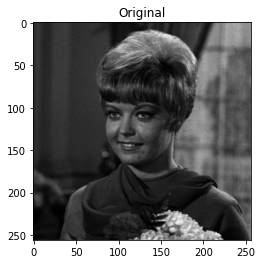

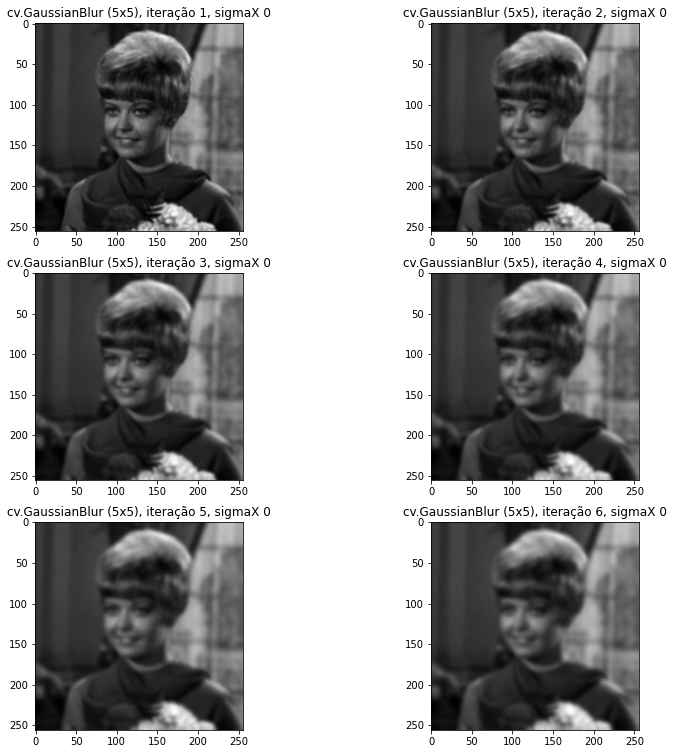

In [25]:
#Loop para 6 Iterações

dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
ksize=5
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = cv.GaussianBlur(dst,(ksize,ksize),0)
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.GaussianBlur ({}x{}), iteração {}, sigmaX 0".format(ksize,ksize,i+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.GaussianBlur ({}x{}), iteração {}, sigmaX 0".format(ksize,ksize,i+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.GaussianBlur ({}x{}), iteração {}, sigmaX 0".format(ksize,ksize,i+1))
plt.show()

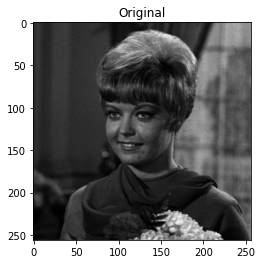

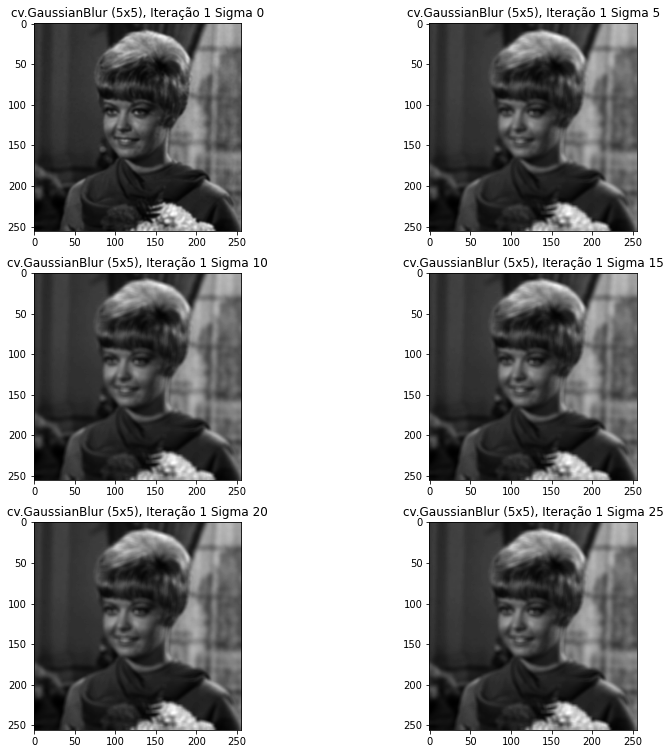

In [26]:
#Loop para 6 Sigmas

img = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(img,cmap="gray")
plt.title("Original")
plt.show()
ksize=5
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = cv.GaussianBlur(img,(ksize,ksize),i*5)
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("cv.GaussianBlur ({}x{}), Iteração 1 Sigma {}".format(ksize,ksize,i*5))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("cv.GaussianBlur ({}x{}), Iteração 1 Sigma {}".format(ksize,ksize,i*5))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("cv.GaussianBlur ({}x{}), Iteração 1 Sigma {}".format(ksize,ksize,i*5))
plt.show()

## Desenvolvimento do Filtro

In [27]:
def gcfilterGaussian (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Gaussian filter
    ## Pre-set steps:
    ### Generate two kernersl (horizontal and vertical)
    #
    Filter.kernel = gaussianKernel(Filter.kernelSize, Filter.kernelSize)
    #################
    central = m.floor((Filter.kernelSize / 2))

    C = np.zeros((size.A.lin + central * 2, size.A.col + central * 2))
    C[(0 + central):(size.A.lin + central), (0 + central):(size.A.col + central)] = A

    #################
    ##  Run the kernel over the matrix (similar to convolution):
    #################
    soma = 0
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):
            # Run kernel in one matrix's elements
            for kl in range(0, Filter.kernelSize):
                for kk in range(0, Filter.kernelSize):

                    soma = (C[j + kl, k + kk] * Filter.kernel[kl, kk]) + soma

            #value = m.ceil((soma / (Filter.kernelSize * Filter.kernelSize)))
            value = m.ceil((soma))
            soma = 0
            D[j, k] = value

    D = np.uint8(D)

    print('#', end=".")

    return D

def gaussianKernel(h1, h2):

    ## Retorna um kernel gaussiano

    gKernel = np.ones((h1,h2))
    ig,jg = gKernel.shape
    #print(" {} ~ {} \n".format(i,j))
    sigma = 1.25 # <<<<<------------------------SIGMA AQUI
    #ranX = [-3,-2,-1,0,1,2,3]
    #ranY = [-3,-2,-1,0,1,2,3]
    ranX = list(range((-ig//2+1),ig//2+1))
    ranY = list(range((-jg//2+1),jg//2+1))
    #print(ranX)
    for x in range(ig):
        X=ranX[x] 
        for y in range(jg): 
            Y=ranY[y]
            PartA = 1/(2*m.pi*sigma**2)
            PartB = m.exp(-(m.pow(X,2)+m.pow(Y,2))/(2*sigma**2))            
            gKernel[x][y] = PartA * PartB #Separadas para análises a parte
    return gKernel


In [28]:
def filterGApply(img, kernelSize, nApl):
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype() #Estruturação
    
    Filter.img = np.array(img) #Recebe imagem    

    Filter.imgSize = nf.structtype() #Estruturação
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape #Recebe linhas e colunas

    #################### Filtro da Gaussiano
    # Kernel def:

    Filter.kernelSize = kernelSize # dimensão do kernel a ser aplicado

    # Número de aplicações do filtro
    numAp = nApl; 

    # Variável auxiliar para guardar a saída
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col)) #"N" matrizes de lin x col
    for k in range(0, numAp): #de 0 (1 iteração) até (numAp-1) aplicações (ou seja, numAp aplicações)
        if k == 0: 
            U[k,:,:] = gcfilterGaussian(Filter) #Matriz K, de todo X e todo Y recebem da função de filtro
            #print(U[k, :, :])
        else:
            Filter.img = U[k-1,:,:] #Para iteração, o novo filter.img é a matriz anterior.
            U[k, :, :] = gcfilterGaussian(Filter) #Aplica novamente o filtro
            #print(U[k,:,:])
    return U[(numAp - 1),:,:] #Retorna a última matriz, todo seu X e todo seu Y. se numAp = 1, retorna a matriz 0

In [9]:
''' #Original
def filterGApply(img, kernelSize, nApl):
    # Cria variavel do tipo struct (similar ao matlab):
    Filter = nf.structtype() #Estruturação
    
    Filter.img = np.array(img) #Recebe imagem    

    Filter.imgSize = nf.structtype() #Estruturação
    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape #Recebe linhas e colunas

    #################### Filtro da Gaussiano
    # Kernel def:

    Filter.kernelSize = kernelSize # dimensão do kernel a ser aplicado

    # Número de aplicações do filtro
    numAp = nApl; 

    # Variável auxiliar para guardar a saída
    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col)) #"N" matrizes de lin x col
    for k in range(0, numAp): #de 0 (1 iteração) até (numAp-1) aplicações (ou seja, numAp aplicações)
        if k == 0: 
            U[k,:,:] = nf.filterGaussian(Filter) #Matriz K, de todo X e todo Y recebem da função de filtro
            #print(U[k, :, :])
        else:
            Filter.img = U[k-1,:,:] #Para iteração, o novo filter.img é a matriz anterior.
            U[k, :, :] = nf.filterGaussian(Filter) #Aplica novamente o filtro
            #print(U[k,:,:])
    return U[(numAp - 1),:,:] #Retorna a última matriz, todo seu X e todo seu Y. se numAp = 1, retorna a matriz 0
'''

' #Original\ndef filterGApply(img, kernelSize, nApl):\n    # Cria variavel do tipo struct (similar ao matlab):\n    Filter = nf.structtype() #Estruturação\n    \n    Filter.img = np.array(img) #Recebe imagem    \n\n    Filter.imgSize = nf.structtype() #Estruturação\n    Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape #Recebe linhas e colunas\n\n    #################### Filtro da Gaussiano\n    # Kernel def:\n\n    Filter.kernelSize = kernelSize # dimensão do kernel a ser aplicado\n\n    # Número de aplicações do filtro\n    numAp = nApl; \n\n    # Variável auxiliar para guardar a saída\n    U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col)) #"N" matrizes de lin x col\n    for k in range(0, numAp): #de 0 (1 iteração) até (numAp-1) aplicações (ou seja, numAp aplicações)\n        if k == 0: \n            U[k,:,:] = nf.filterGaussian(Filter) #Matriz K, de todo X e todo Y recebem da função de filtro\n            #print(U[k, :, :])\n        else:\n            Filter.img 

In [10]:
'''
x,y = np.mgrid[0:5,0:5]
print(x-5/2)
print(y-5/2)
ssi = 0.5
g = np.exp( -( x**2 + y**2 ) / (2*sigma**2) )
print(g)
print(g/g.sum())
##Plot
plt.imshow(g/g.sum(), cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()
'''

"\nx,y = np.mgrid[0:5,0:5]\nprint(x-5/2)\nprint(y-5/2)\nssi = 0.5\ng = np.exp( -( x**2 + y**2 ) / (2*sigma**2) )\nprint(g)\nprint(g/g.sum())\n##Plot\nplt.imshow(g/g.sum(), cmap=plt.get_cmap('jet'), interpolation='nearest')\nplt.colorbar()\nplt.show()\n"

In [11]:
'''
x, y = np.mgrid[-5:5+1, -5:5+1]
#print(x-5/2)
#print(y-5/2)
g = np.exp(-(x**2/float(5)+y**2/float(5)))
print(g/g.sum())
plt.imshow(g/g.sum(), cmap=plt.get_cmap('jet'), interpolation='nearest')
plt.colorbar()
plt.show()
'''

"\nx, y = np.mgrid[-5:5+1, -5:5+1]\n#print(x-5/2)\n#print(y-5/2)\ng = np.exp(-(x**2/float(5)+y**2/float(5)))\nprint(g/g.sum())\nplt.imshow(g/g.sum(), cmap=plt.get_cmap('jet'), interpolation='nearest')\nplt.colorbar()\nplt.show()\n"

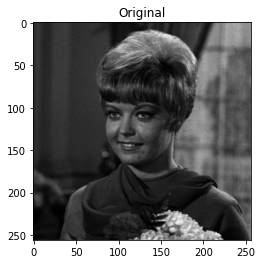

#.#.#.#.#.#.

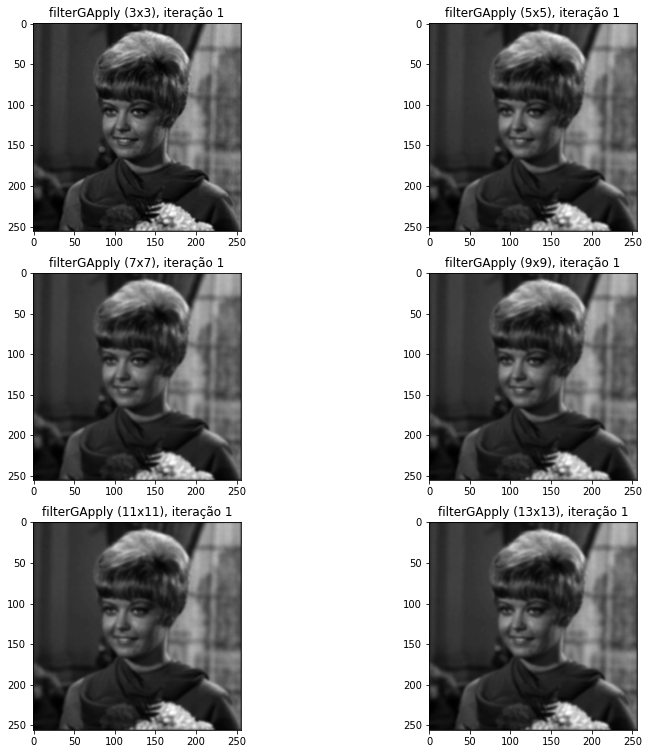

In [29]:
#Loop para 6 Kernels
src = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(src,cmap="gray")
plt.title("Original")
plt.show()
#Entradas do kernel e de iterações
#ksize = 5
nits = 1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)
i = 0
ksizes = [3,5,7,9,11,13]
for ksize in ksizes:
    dst = filterGApply(src, ksize, 1)
    f.set_figheight(13)
    f.set_figwidth(13)    
    if ksize < 7 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    elif ksize < 10 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,nits))
    i+=1
plt.show()

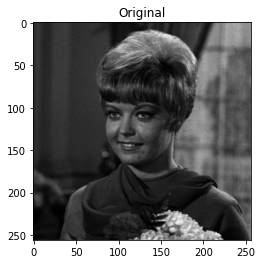

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.

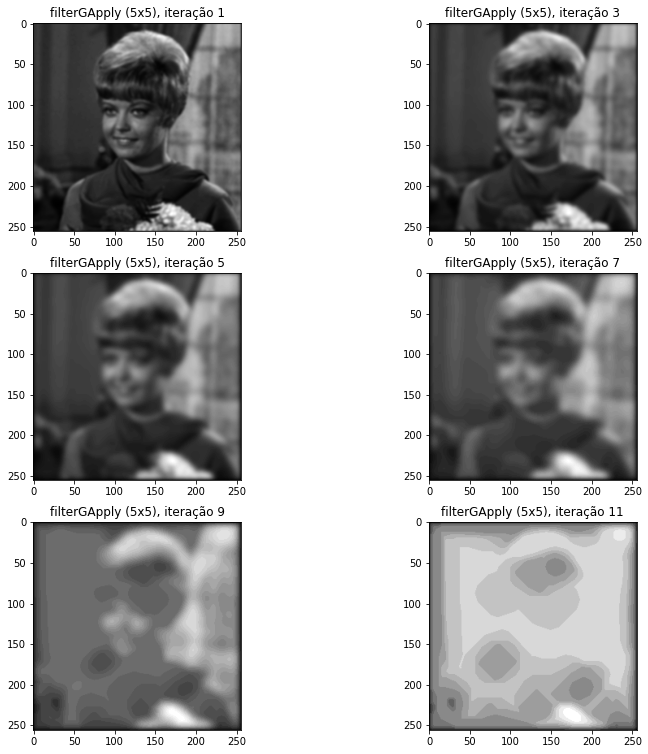

In [30]:
#Loop para 6 Iterações
dst = cv.imread("../gcPDI/imgPDI/female01.tiff",0)
plt.imshow(dst,cmap="gray")
plt.title("Original")
plt.show()
ksize=5
#nit=1
#Modo figura para poder escalar a imagem
f, axarr = plt.subplots(3, 2)

for i in range(6):
    dst = filterGApply(dst, ksize, (i*2)+1)  
    f.set_figheight(13)
    f.set_figwidth(13)    
    if i < 2 :
        axarr[0, i].imshow(dst,"gray")
        axarr[0, i].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    elif i < 4 :
        axarr[1, i-2].imshow(dst,"gray")
        axarr[1, i-2].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
    else :
        axarr[2, i-4].imshow(dst,"gray")
        axarr[2, i-4].set_title("filterGApply ({}x{}), iteração {}".format(ksize,ksize,(i*2)+1))
plt.show()

Imagens de análise:


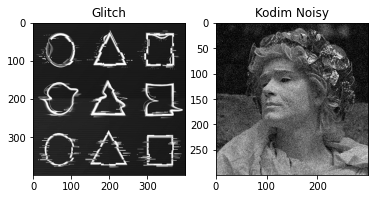

#.#.
 Kernel Size: 15, Iterações: 1


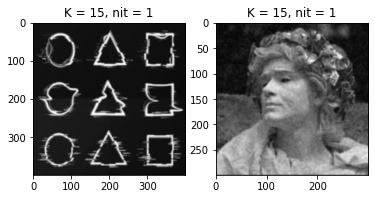

In [31]:
#Entradas do kernel e de iterações
ksize = 15 #<--
nits = 1
#Loop para A&B -> testar kernel
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = filterGApply(imgA, ksize, nits)
imgBG = filterGApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

Imagens de análise:


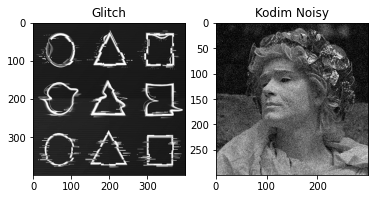

#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.#.
 Kernel Size: 5, Iterações: 10


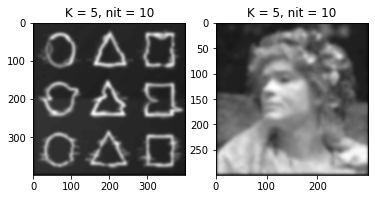

In [32]:
#Entradas do kernel e de iterações
ksize = 5
nits = 10 #<--
#Loop para A&B -> testar iteração
imgA = cv.imread("../gcPDI/imgMy/glitch.jpg",0)
imgB = cv.imread("../gcPDI/imgMy/kodimnoisy300.jpg",0)
print("Imagens de análise:")
plt.subplot(1,2,1)
plt.title("Glitch")
plt.imshow(imgA,"gray")
plt.subplot(1,2,2)
plt.title("Kodim Noisy")
plt.imshow(imgB,"gray")
plt.show()
#
imgAG = filterGApply(imgA, ksize, nits)
imgBG = filterGApply(imgB, ksize, nits)
print("\n Kernel Size: {}, Iterações: {}".format(ksize,nits))
plt.subplot(1,2,1)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgAG,"gray")
plt.subplot(1,2,2)
plt.title("K = {}, nit = {}".format(ksize,nits))
plt.imshow(imgBG,"gray")
plt.show()

A diferença do código manual para o código implementado na biblioteca OpenCV mostra as divergências causadas pela dificuldade de saber exxatamente como é esse filtro em caixas fechadas, dependendo muito da implementação do código em si, além do tempo de processamento ser maior do que pelo OpenCV.

## Fontes:

https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Gaussian%20Filtering_1up.pdf